# Claculate and Plot Activity

Example: Given an existing database for Al-Zn, we would like to calculate the activity of the liquid

In order to make sure we are correct, we’ll compare the values with experimental results. Experimental activities are digtized from Fig 18 in A. Yazawa, Y.K. Lee, Thermodynamic Studies of the Liquid Aluminum Alloy Systems, Trans. Japan Inst. Met. 11 (1970) 411–418. https://doi.org/10.2320/matertrans1960.11.411.

The measurements at at 1073 K and they used a reference state of the pure Zn at that temperature.

In [21]:
exp_x_zn =   [0.0482, 0.1990, 0.3550, 0.5045, 0.6549, 0.8070, 0.9569]
exp_acr_zn = [0.1154, 0.3765, 0.5411, 0.6433, 0.7352, 0.8384, 0.9531]

## Importing modules

In [3]:
from pycalphad import Database, equilibrium, variables as v
import matplotlib.pyplot as plt
import numpy as np

## Define file paths for program and database

Here the directories for the location of the plot activity program as well as the directory for the database.

In [4]:
# Set the file path
tdb_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'

## Load database

The database selected is taken from COST507 improved version from Sundman (developer of openCALPHAD)

In [14]:
dbf = Database(tdb_diretory + 'COST507_Sundman.tdb')

## Load phases that will be considered

In [15]:
comps = ['AL', 'ZN', 'VA']
phases = list(tdb.phases.keys())
temp = 1073 #K
#phases

# Calculate the reference state

Because all chemical activities must be specified with a reference state, we’re going to choose a reference state as the pure element at the same temperature, consistent with the experimental data.

In [16]:
# v.X('ZN'): 1 means that reference calculation was done with pure Zn which is equl to 1 but gave error. Removed from it
ref_eq = equilibrium(dbf, ['ZN'], phases, {v.P: 101325, v.T: temp})

# Calculate the equilibria

Do the calculation over the composition range

In [17]:
eq = equilibrium(dbf, comps, phases, {v.P: 101325, v.T: temp, v.X('ZN'): (0, 1, 0.005)})

# Get the chemical potentials and calculate activity

We need to select the chemical potentials from the xarray Dataset and calculate the activity.

In [18]:
#Extraction of chemical potential from the equilibrium calculations
chempot_ref = ref_eq.MU.sel(component='ZN').squeeze()
chempot = eq.MU.sel(component='ZN').squeeze()

acr_zn = np.exp((chempot - chempot_ref)/(8.315*temp)) #Activity calculation

# Pot the results

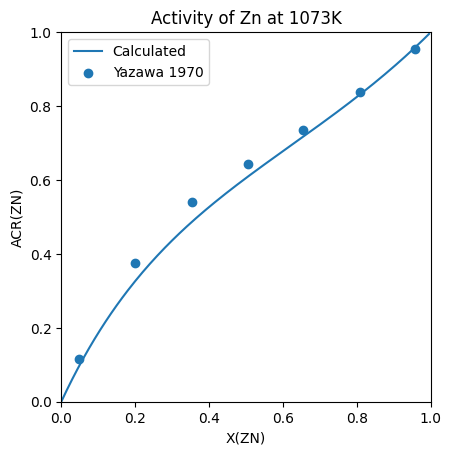

In [22]:
plt.plot(eq.X.sel(component='ZN', vertex=0).squeeze(), acr_zn, label='Calculated')

# add experimental data
plt.scatter(exp_x_zn, exp_acr_zn, label='Yazawa 1970')

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.gca().set_aspect(1)
plt.xlabel('X(ZN)')
plt.ylabel('ACR(ZN)')
plt.title('Activity of Zn at 1073K')
plt.legend(loc=0)